<a href="https://colab.research.google.com/github/julianencisoizquierdo/Graphs_NetworkX_Python/blob/main/Graphs_NetworkX_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

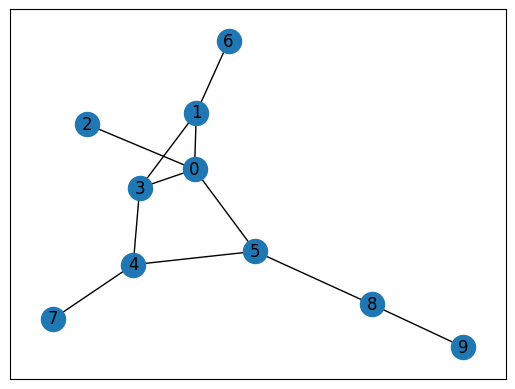

In [148]:
import networkx as nx
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

G1 = nx.Graph()
G1.add_edges_from([(0, 1),
                   (0, 2),
                   (0, 3),
                   (0, 5),
                   (1, 3),
                   (1, 6),
                   (3, 4),
                   (4, 5),
                   (4, 7),
                   (5, 8),
                   (8, 9)])

nx.draw_networkx(G1)

### **Adjacency List**

In [149]:
adj_list = nx.to_dict_of_lists(G1)

print("Adjacency List:")
for node, neighbors in adj_list.items():
    print(f"{node}: {neighbors}")

Adjacency List:
0: [1, 2, 3, 5]
1: [0, 3, 6]
2: [0]
3: [0, 1, 4]
5: [0, 4, 8]
6: [1]
4: [3, 5, 7]
7: [4]
8: [5, 9]
9: [8]


In [150]:
G2 = nx.read_adjlist('/content/drive/MyDrive/Colab Notebooks/Networks/G_adjlist.txt', nodetype=int)
G2.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 5), (1, 3), (1, 6), (3, 4), (5, 4), (5, 8), (4, 7), (8, 9)])

### **Adjacency Matrix**

In [151]:
G_mat = np.array([[0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
                  [1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
                  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
                  [1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
                  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
                  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])
G_mat

array([[0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [152]:
G3 = nx.Graph(G_mat)
G3.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 5), (1, 3), (1, 6), (3, 4), (4, 5), (4, 7), (5, 8), (8, 9)])

### **Edgelist**

In [153]:
G4 = nx.read_edgelist('/content/drive/MyDrive/Colab Notebooks/Networks/G_edgelist.txt', data=[('Weight', int)])

G4.edges(data=True)

EdgeDataView([('0', '1', {'Weight': 4}), ('0', '2', {'Weight': 3}), ('0', '3', {'Weight': 2}), ('0', '5', {'Weight': 6}), ('1', '3', {'Weight': 2}), ('1', '6', {'Weight': 5}), ('3', '4', {'Weight': 3}), ('5', '4', {'Weight': 1}), ('5', '8', {'Weight': 6}), ('4', '7', {'Weight': 2}), ('8', '9', {'Weight': 1})])

### **Pandas Dataframe**

In [154]:
G_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Networks/G_edgelist.txt', delim_whitespace=True,
                   header=None, names=['n1', 'n2', 'weight'])
G_df

,n1,n2,weight
0,0,1,4
1,0,2,3
2,0,3,2
3,0,5,6
4,1,3,2
5,1,6,5
6,3,4,3
7,4,5,1
8,4,7,2
9,5,8,6


In [155]:
G5 = nx.from_pandas_edgelist(G_df, 'n1', 'n2', edge_attr='weight')
G5.edges(data=True)

EdgeDataView([(0, 1, {'weight': 4}), (0, 2, {'weight': 3}), (0, 3, {'weight': 2}), (0, 5, {'weight': 6}), (1, 3, {'weight': 2}), (1, 6, {'weight': 5}), (3, 4, {'weight': 3}), (5, 4, {'weight': 1}), (5, 8, {'weight': 6}), (4, 7, {'weight': 2}), (8, 9, {'weight': 1})])

### **Chess Example**

In [156]:
chess = nx.read_edgelist('/content/drive/MyDrive/Colab Notebooks/Networks/chess_graph.txt', data=[('outcome', int), ('timestamp', float)],
                         create_using=nx.MultiDiGraph())

In [157]:
chess.is_directed(), chess.is_multigraph()

(True, True)

In [158]:
list(chess.edges(data=True))[0:10]

[('1', '2', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('1', '3', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('1', '4', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('1', '5', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('1', '6', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('1', '807', {'outcome': 0, 'timestamp': 896148000.000003}),
 ('1', '454', {'outcome': 0, 'timestamp': 896148000.000003}),
 ('1', '827', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('1', '1240', {'outcome': 0, 'timestamp': 906660000.0}),
 ('1', '680', {'outcome': 0, 'timestamp': 906660000.0})]

In [159]:
import datetime

# Accessing timestamps associated with each edge
timestamps = [data['timestamp'] for _, _, data in chess.edges(data=True)]

# Convert each timestamp to a human-readable format
formatted_timestamps = []
for timestamp in timestamps:
    date_time = datetime.datetime.fromtimestamp(timestamp)
    formatted_timestamps.append(date_time)

In [160]:
# Iterate over edges and update timestamps
for (u, v, data), formatted_timestamp in zip(chess.edges(data=True), formatted_timestamps):
    # Add the formatted timestamp to the data dictionary
    data['formatted_timestamp'] = formatted_timestamp
    # Remove the old 'timestamp' from the data dictionary
    data.pop('timestamp', None)

# Print the first few edges to verify the changes
list(chess.edges(data=True))[:5]

[('1',
  '2',
  {'outcome': 0,
   'formatted_timestamp': datetime.datetime(1998, 1, 24, 9, 59, 59, 999997)}),
 ('1',
  '3',
  {'outcome': 0,
   'formatted_timestamp': datetime.datetime(1998, 1, 24, 9, 59, 59, 999997)}),
 ('1',
  '4',
  {'outcome': 0,
   'formatted_timestamp': datetime.datetime(1998, 1, 24, 9, 59, 59, 999997)}),
 ('1',
  '5',
  {'outcome': 1,
   'formatted_timestamp': datetime.datetime(1998, 1, 24, 9, 59, 59, 999997)}),
 ('1',
  '6',
  {'outcome': 0,
   'formatted_timestamp': datetime.datetime(1998, 1, 24, 9, 59, 59, 999997)})]

In [161]:
games_played = chess.degree()
list(games_played)[0:10]

[('1', 48),
 ('2', 112),
 ('3', 85),
 ('4', 12),
 ('5', 18),
 ('6', 95),
 ('7', 9),
 ('8', 20),
 ('9', 142),
 ('10', 4)]

In [162]:
print(type(games_played))

<class 'networkx.classes.reportviews.DiMultiDegreeView'>


In [163]:
max_value = max(dict(games_played).values())
max_key, = [i for i in dict(games_played).keys() if games_played[i] == max_value]

print('player {}\n{} games'.format(max_key, max_value))

player 461
280 games


In [164]:
df = pd.DataFrame(chess.edges(data=True), columns=['white', 'black', 'outcome'])
df.head()

,white,black,outcome
0,1,2,"{'outcome': 0, 'formatted_timestamp': 1998-01-..."
1,1,3,"{'outcome': 0, 'formatted_timestamp': 1998-01-..."
2,1,4,"{'outcome': 0, 'formatted_timestamp': 1998-01-..."
3,1,5,"{'outcome': 1, 'formatted_timestamp': 1998-01-..."
4,1,6,"{'outcome': 0, 'formatted_timestamp': 1998-01-..."


In [165]:
df['outcome'] = df['outcome'].map(lambda x: x['outcome'])
df.head()

,white,black,outcome
0,1,2,0
1,1,3,0
2,1,4,0
3,1,5,1
4,1,6,0


In [166]:
df['outcome'].value_counts()

outcome
 0    28666
 1    21163
-1    15224
Name: count, dtype: int64

In [167]:
min_value = df['white'].min()
max_value = df['white'].max()

print(min_value, max_value)

1 999


In [168]:
value_counts_white = df['white'].value_counts()
value_counts_white.head()

white
98     152
461    147
467    143
330    132
371    131
Name: count, dtype: int64

In [169]:
count_ones = df['white'].value_counts()[1]
count_ones

147

In [170]:
outcome_1 = df[df['outcome']==1]
outcome_1


,white,black,outcome
3,1,5,1
19,1,925,1
20,1,91,1
23,1,3644,1
27,2,1166,1
...,...,...,...
65035,7279,7211,1
65038,7281,1650,1
65040,7283,6739,1
65047,7288,6136,1


In [171]:
won_as_white = outcome_1.groupby('white')['black'].size().reset_index().rename(columns = {'black': 'won_counts_aswhite'})
won_as_white

,white,won_counts_aswhite
0,1,4
1,100,4
2,1002,1
3,1003,4
4,1005,5
...,...,...
4325,995,5
4326,996,2
4327,997,7
4328,998,3


In [172]:
outcome_1 = df[df['outcome']==-1]
outcome_1

,white,black,outcome
10,1,166,-1
26,2,3,-1
31,2,2010,-1
37,2,14,-1
38,2,277,-1
...,...,...,...
65037,7281,5923,-1
65044,7287,1234,-1
65045,7287,1206,-1
65046,7288,684,-1


In [173]:
won_as_black = outcome_1.groupby('black')['white'].size().reset_index().rename(columns = {'white': 'won_counts_asblack'})
won_as_black

,black,won_counts_asblack
0,1,3
1,100,3
2,1000,1
3,1003,1
4,1005,8
...,...,...
3908,994,1
3909,995,2
3910,996,1
3911,997,6


In [174]:
player_unified = pd.merge(won_as_white, won_as_black, left_on='white', right_on='black', how='outer').fillna(0).drop(['black'], axis = 1)
player_unified.head()

,white,won_counts_aswhite,won_counts_asblack
0,1,4.0,3.0
1,100,4.0,3.0
2,1002,1.0,0.0
3,1003,4.0,1.0
4,1005,5.0,8.0


In [175]:
player_unified['total_won'] = player_unified['won_counts_aswhite'] + player_unified['won_counts_asblack']
player_unified.head()

,white,won_counts_aswhite,won_counts_asblack,total_won
0,1,4.0,3.0,7.0
1,100,4.0,3.0,7.0
2,1002,1.0,0.0,1.0
3,1003,4.0,1.0,5.0
4,1005,5.0,8.0,13.0


In [176]:
player_unified.nlargest(5, 'total_won')

,white,won_counts_aswhite,won_counts_asblack,total_won
1899,330,62.0,47.0,109.0
2869,467,59.0,44.0,103.0
4314,98,62.0,32.0,94.0
2788,456,49.0,39.0,88.0
2824,461,67.0,21.0,88.0
